<center><h1>Titanic Tutorial

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [35]:
df_train = pd.read_csv("Dataset/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df_test = pd.read_csv("Dataset/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h2>Explore Patterns

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [39]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [41]:
df_train['Sex'] = df_train['Sex'].replace(['female', 'male'], [0, 1]) #0 -> female; 1 -> male
df_train['Sex'].value_counts()

/tmp/ipykernel_12734/2234762426.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Sex'] = df_train['Sex'].replace(['female', 'male'], [0, 1]) #0 -> female; 1 -> male


Sex
1    577
0    314
Name: count, dtype: int64

In [42]:
print(f'Procent of women who survived is: {round(df_train.loc[(df_train['Sex'] == 0) & (df_train['Survived'] == 1), 'Survived'].sum() / 
      len(df_train.loc[df_train['Sex'] == 0, 'Survived']) * 100, 3)}%')

Procent of women who survived is: 74.204%


In [43]:
print(f'Procent of men who survived is: {round(df_train.loc[(df_train['Sex'] == 1) & (df_train['Survived'] == 1), 'Survived'].sum() / 
      len(df_train.loc[df_train['Sex'] == 1, 'Survived']) * 100, 3)}%')

Procent of men who survived is: 18.891%


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


<h2>Features that count

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Sex           -0.543351
dtype: float64


<Axes: >

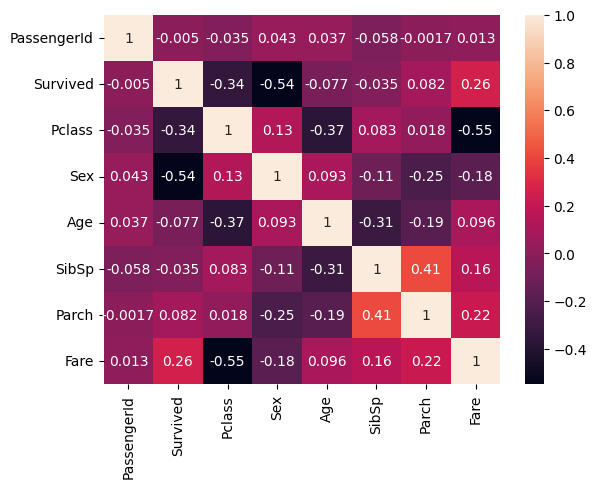

In [45]:
numeric_features = df_train.select_dtypes(include = ['number'])
#print(numeric_features.columns)
y = df_train['Survived']
corelatii = numeric_features.corrwith(y)
print(corelatii.sort_values(ascending=False))
sns.heatmap((numeric_features.corr()), annot=True)

In [46]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [47]:
#delete the column cabin(a lot of null values)
del df_train['Cabin']

In [48]:
df_train.loc[df_train['Age'].isnull(), 'Age'] = df_train['Age'].mean()

In [49]:
df_train.loc[df_train['Embarked'].isnull(), 'Embarked'] = df_train['Embarked'].mode()[0]

In [50]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

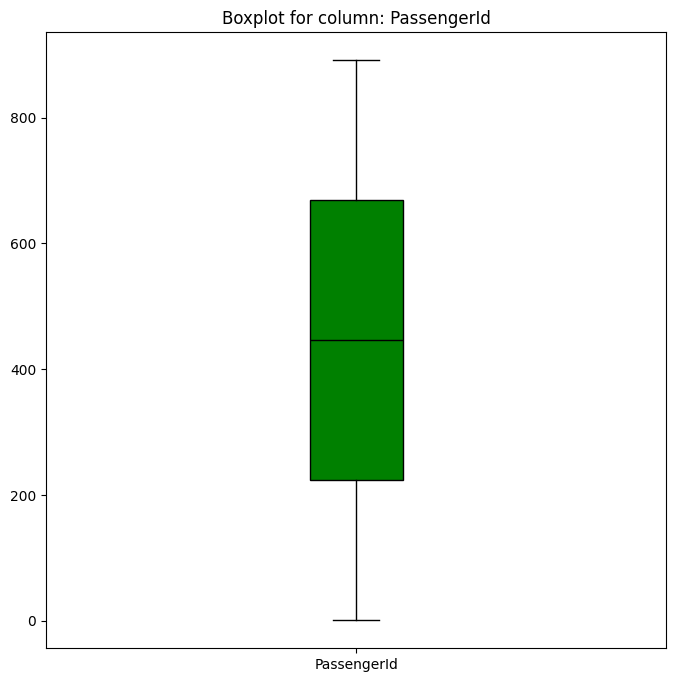

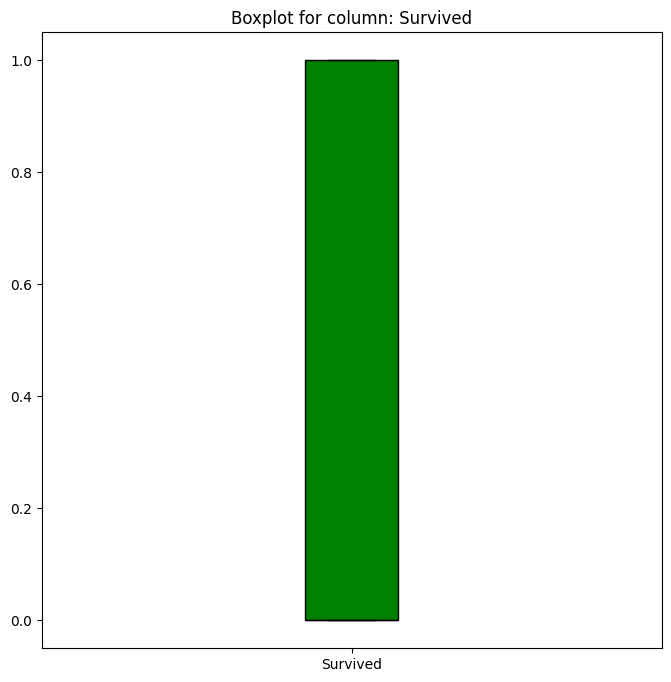

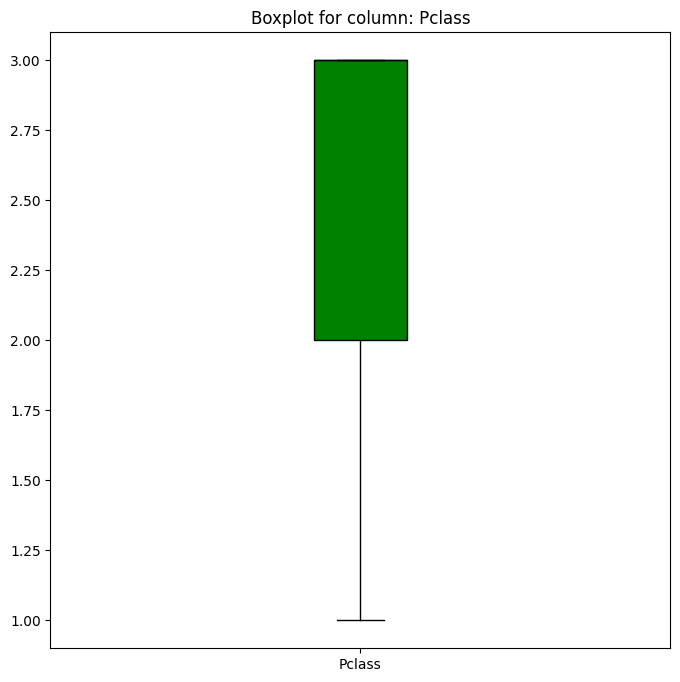

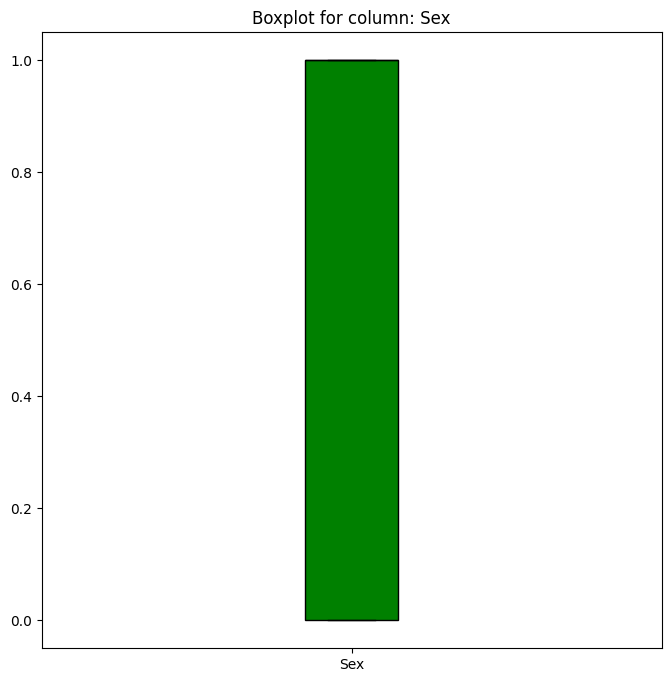

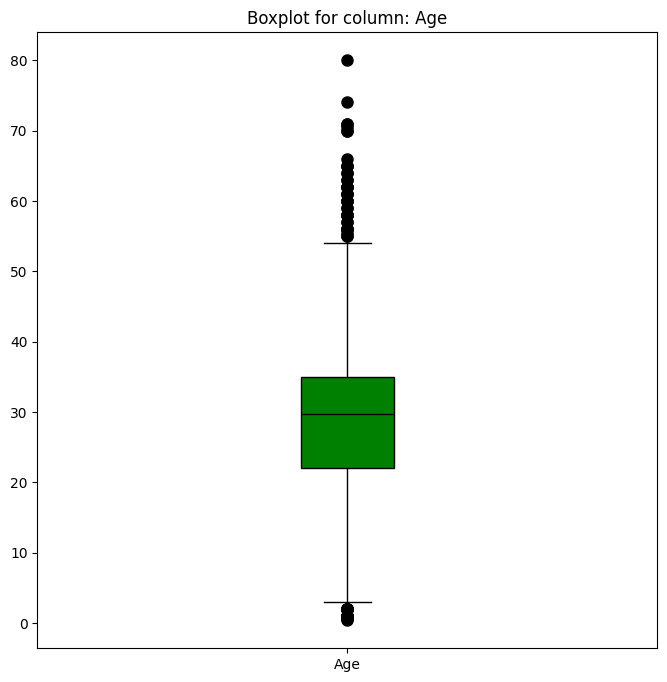

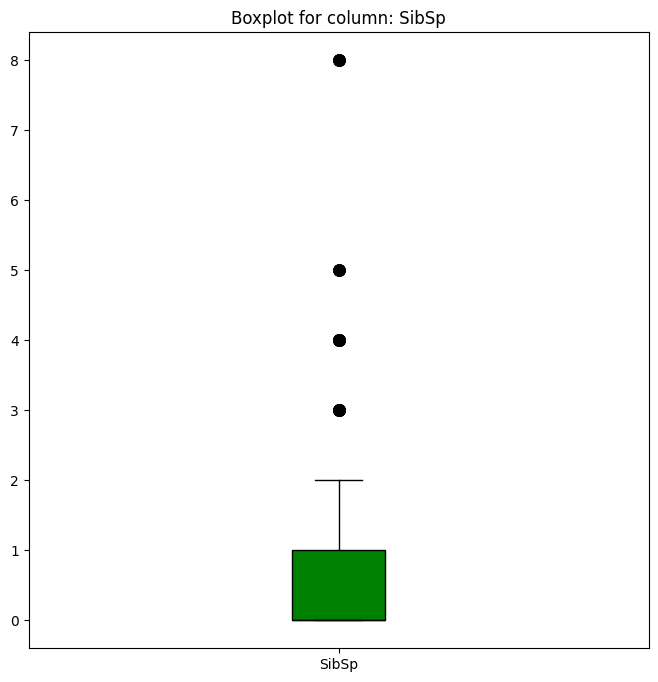

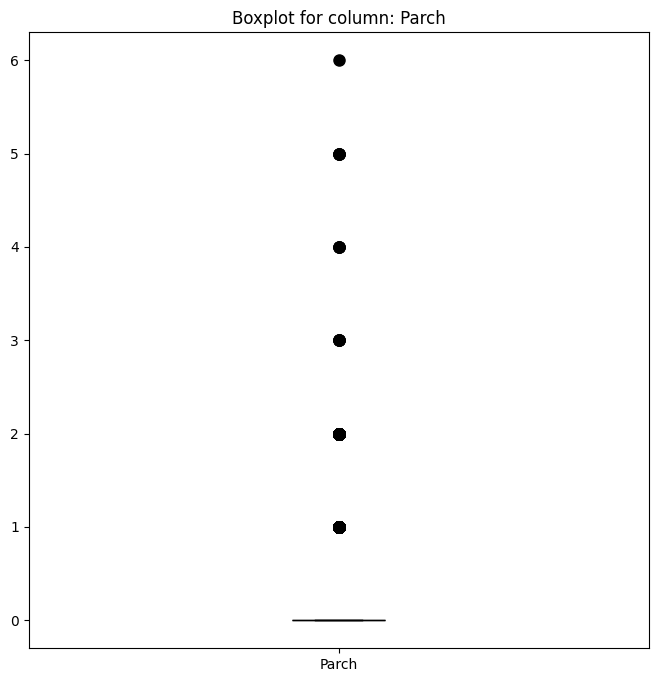

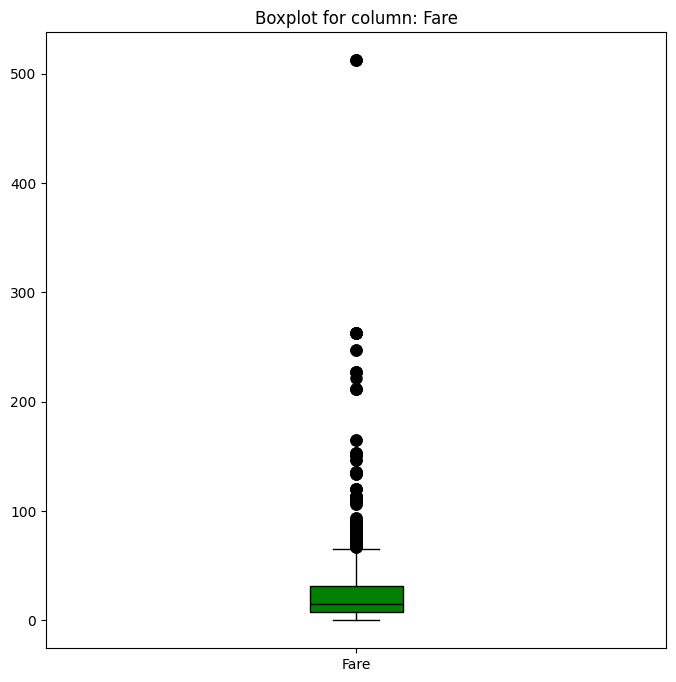

In [51]:
# fig = plt.figure(figsize=(15, 20))
# ax = fig.add_subplot(111)
# plt.boxplot(numeric_features)
# ax.set_xticklabels(numeric_features)
for col in numeric_features:
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    plt.boxplot(df_train[col], vert=True, patch_artist=True,
            boxprops=dict(facecolor='green',color='black'),
            medianprops=dict(color='black'),
            flierprops=dict(marker='o',markersize=8, markerfacecolor='black'),)
    ax.set_xticklabels([col])
    plt.title(f'Boxplot for column: {col}')

In [52]:
df_train['Embarked'] = df_train['Embarked'].replace(['S','C','Q'], [0, 1, 2])
#print(df_train['Embarked'])

/tmp/ipykernel_12734/1789686605.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Embarked'] = df_train['Embarked'].replace(['S','C','Q'], [0, 1, 2])


In [53]:
df_test['Sex'] = df_test['Sex'].replace(['female', 'male'], [0, 1]) #0 -> female; 1 -> male
df_test['Sex'].value_counts()

/tmp/ipykernel_12734/2583752001.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Sex'] = df_test['Sex'].replace(['female', 'male'], [0, 1]) #0 -> female; 1 -> male


Sex
1    266
0    152
Name: count, dtype: int64

In [54]:
df_test['Embarked'] = df_test['Embarked'].replace(['S','C','Q'], [0, 1, 2])
#print(df_train['Embarked'])

/tmp/ipykernel_12734/2739165659.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Embarked'] = df_test['Embarked'].replace(['S','C','Q'], [0, 1, 2])


In [55]:
y = df_train['Survived']
X = df_train.drop(['Survived', 'Name', 'PassengerId', 'Ticket'], axis = 1)
print(X.columns)
X_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
print(X_test.head())
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X,y)
prediction = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': prediction})
output.to_csv('submission.csv', index=False)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5      0      0   7.8292         2
1       3    0  47.0      1      0   7.0000         0
2       2    1  62.0      0      0   9.6875         2
3       3    1  27.0      0      0   8.6625         0
4       3    0  22.0      1      1  12.2875         0
